<h1>Cape Town Food Deserts v2</h1>
<h3>Cassandra da Cruz</h3>

<h2>Table of contents</h2>
<p>
    <ul>
        <li>Introduction</li>
        <li>Data</li>
        <li>Methodology</li>
        <li>Analysis</li>
        <li>Results and discussion</li>
        <li>Conclusion</li>
        </ul>
        </p>

<h2>1. Introduction</h2>
<p>This short report seeks to describe the relationship between the geography of Cape Town, the location of poor households and their access to different types of food sources.</p>

<p> Malnutrition in the city is a hidden hunger, partly due to wide access to energy-dense, nutrient-deficient foods. Many residents can reach their energy intake requirements, but not their macro- and micro-nutrient requirements for a healthy lifestyle.</p>

<p>As the State will shoulder the majority of the burden of diabetes, heart disease and obesity associated with poor diet, it is in the best interests of policymakers to address food insecurity across the city. We will attempt to group neighbourhoods of Cape Town based on income and food access so that these groupings can be addressed with different interventions.</p>

<h2>2. Data</h2>
<p>Census data from 2011 will be used to determine the number of people, number of households and percentage of indigent (impoverished) households per voting ward in the City of Cape Town municipality. A household is classified as indigent if their combined monthly income is R3 200 or less (about $175).</p>

<p>
<ul>
<li>A GeoJSON file will be used to construct a <b>choropleth map</b> of the 111 wards and the percentage of indigent households per ward.</li>
<li>The <b>Foursquare Places API</b> will be used to search for all venues around the center of each ward with a 2 500 m radius and a limit of 1 000 venues.</i>
<li>The venues data returned is refined by removing all non-food venues and then <b>classifying the food venues</b> into fresh food (supermarkets, green grocers, butchers), fringe food (fast food, tuck shops) and restaurants.</li>
<li>The wards will then be <b>k-means clustered</b> according to quintiles of indigent households and the number of food venues per category (fresh food, fringe food, restaurants).</li>
<li>This will then be plotted over a <b>map of Cape Town</b>.</li></ul></p>

<h2>3. Methodology</h2>

<h3>3.1 Importing libraries</h3>
<p>All the libraries that will be used in this notebook are imported.</p>

In [4]:
#Importing libraries
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes
import requests #request library
import csv
!pip install geopandas
import geopandas as gpd
import json # library to handle JSON files
!conda install -c conda-forge geopy --yes
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import matplotlib.cm as cm # Matplotlib and associated plotting modules
import matplotlib.colors as colors
from sklearn.cluster import KMeans # import k-means from clustering stage
!pip install folium
import folium # map rendering library
print('Libraries imported.')

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::dask-core==2021.10.0=pyhd3eb1b0_0
  - defaults/noarch::babel==2.9.1=pyhd3eb1b0_0
  - defaults/noarch::conda-pack==0.6.0=pyhd3eb1b0_0
  - defaults/noarch::tifffile==2021.7.2=pyhd3eb1b0_2
  - defaults/osx-64::scikit-learn==1.0.2=py39hae1ba45_1
  - conda-forge/osx-64::conda==4.11.0=py39h6e9494a_0
  - defaults/noarch::imageio==2.9.0=pyhd3eb1b0_0
  - defaults/osx-64::numba==0.54.1=py39hae1ba45_0
  - defaults/osx-64::jupyter==1.0.0=py39hecd8cb5_7
  - defaults/osx-64::brotlipy==0.7.0=py39h9ed2024_1003
  - defaults/noarch::python-lsp-black==1.0.0=pyhd3eb1b0_0
  - defaults/osx-64::gevent==21.8.0=py39h9ed2024_1
  - defaults/osx-64::bottleneck==1.3.2=py39he3068b8_1
  - defaults/osx-64::mkl_random==1.2.2=py39hb2f4e1b_0
  - defaults/osx-64::zope.event==4.5.0=py39hecd8cb5_0
  - defaults/noarch::nbclient==0.5.3=pyhd3eb1b0_0
  - de

<h3>3.2 Using GeoPy to get coordinates of Cape Town and create a map using Folium</h3>
<p>The address of <b>Cape Town, South Africa</b> is inputted into geocode and the latitude and longitude for the address are called using GeoPy. The coordinates for the centre of Cape Town will be used in later maps. This map shows Cape Town's location for readers.</p>

In [5]:
#Use geopy library to get coordinates of Cape Town for a map

address = "Cape Town, Western Cape"
geolocator = Nominatim(user_agent = "capetown_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("The geographical coordinates of {} are {}, {}.".format(address,latitude,longitude))

The geographical coordinates of Cape Town, Western Cape are -33.928992, 18.417396.


In [6]:
#Create a map of Cape Town with postal codes
map_capetown = folium.Map(location = [latitude,longitude], zoom_start = 10
                         )
map_capetown

<h3>3.3 Reading in Cape Town wards geoJSON file</h3>
<p>This geoJSON file was downloaded from the City of Cape Town municipality website beforehand and is now read into the notebook as a geodataframe. This method was used because direct downloading of the file was rate limited.</p>
<p>The shapefiles and locations of each Cape Town voting ward (2016) is contained within this file and will be used to plot the polygons of wards for choropleth maps.</p>

In [7]:
#Read ward data geojson downloaded from CoCT website read into a geodataframe
ward_data = gpd.read_file('Wards.geojson')
ward_dat

OBJECTID WARD_NAME  WARD_YEAR  Shape_STArea_1  Shape_STLength_1  \
0         217        61       2016               0                 0   
1         218       100       2016               0                 0   
2         219        86       2016               0                 0   
3         220        85       2016               0                 0   
4         221        83       2016               0                 0   
..        ...       ...        ...             ...               ...   
111       328       104       2016               0                 0   
112       329        23       2016               0                 0   
113       330       105       2016               0                 0   
114       331        32       2016               0                 0   
115       332        29       2016               0                 0   

      ShapeSTArea  ShapeSTLength  \
0    1.665393e+08   93184.353989   
1    1.121129e+08   69591.906001   
2    4.022435e+06   12266.260191   
3    4.182490e+06   11355.521156   
4    6.177509e+06   12809.780372   
..            ...            ...   
111  3.227354e+07   34929.474237   
112  9.395520e+07   49213.016683   
113  4.688217e+08  121904.575559   
114  1.999808e+08   88489.383852   
115  1.720068e+08   73223.527577   

                                              geometry  
0    POLYGON ((18.34307 -34.12795, 18.34294 -34.127...  
1    POLYGON ((18.96389 -34.15246, 18.96334 -34.152...  
2    POLYGON ((18.87634 -34.11745, 18.86994 -34.113...  
3    POLYGON ((18.85646 -34.10521, 18.85623 -34.105...  
4    POLYGON ((18.85646 -34.10521, 18.85608 -34.104...  
..                                                 ...  
111  POLYGON ((18.54785 -33.80474, 18.54785 -33.804...  
112  POLYGON ((18.51017 -33.72127, 18.50955 -33.719...  
113  POLYGON ((18.76781 -33.82659, 18.76780 -33.826...  
114  POLYGON ((18.61060 -33.58508, 18.60997 -33.585...  
115  POLYGON ((18.54050 -33.52659, 18.54048 -33.526...  

[116 rows x 8 columns]

<h3>3.4 Merging 2016 ward allocations to represent 2011 ward allocations</h3>
<p>As the census data is from 2011, the 2016 wards are merged to represent the ward allocations of 2011. The true demographics and statistics of each ward are now correctly geographically attributed.</p>

In [17]:
#Copying ward_data dataframe to merge shapefiles together
ward_data3 = ward_data
ward_data3['WARD_NAME'] = pd.to_numeric(ward_data3['WARD_NAME'])
ward_data3.sort_values(by="WARD_NAME",ascending = True, inplace = True)
ward_data3.reset_index(drop = True,inplace = True)
ward_data3.replace({'WARD_NAME': {113: 107, 115: 77,114: 16, 116:99, 112:21}},inplace = True)
ward_data4 = ward_data3.dissolve(by='WARD_NAME')
ward_data4

geometry  OBJECTID  \
WARD_NAME                                                                
1          POLYGON ((18.57779 -33.83876, 18.57212 -33.835...       326   
2          POLYGON ((18.60576 -33.88947, 18.60499 -33.889...       310   
3          POLYGON ((18.66856 -33.91399, 18.66977 -33.911...       312   
4          POLYGON ((18.53297 -33.84825, 18.52953 -33.847...       317   
5          POLYGON ((18.55346 -33.89038, 18.55335 -33.889...       316   
...                                                      ...       ...   
107        POLYGON ((18.51960 -33.81500, 18.52089 -33.817...       327   
108        POLYGON ((18.68408 -33.96293, 18.68166 -33.962...       279   
109        POLYGON ((18.74304 -34.02285, 18.74301 -34.022...       241   
110        POLYGON ((18.49460 -34.04661, 18.49376 -34.045...       229   
111        POLYGON ((18.74097 -33.85364, 18.74113 -33.853...       319   

           WARD_YEAR  Shape_STArea_1  Shape_STLength_1   ShapeSTArea  \
WARD_NAME                                                              
1               2016               0                 0  2.721445e+07   
2               2016               0                 0  9.222773e+06   
3               2016               0                 0  1.089155e+07   
4               2016               0                 0  1.275129e+07   
5               2016               0                 0  8.859468e+06   
...              ...             ...               ...           ...   
107             2016               0                 0  9.883493e+06   
108             2016               0                 0  7.307969e+06   
109             2016               0                 0  3.752252e+07   
110             2016               0                 0  3.058917e+06   
111             2016               0                 0  5.885184e+06   

           ShapeSTLength  
WARD_NAME                 
1           29298.486277  
2           18868.036279  
3           15095.679371  
4           20288.644301  
5           13006.277738  
...                  ...  
107         17495.884963  
108         16717.334048  
109         31178.442245  
110         13654.510887  
111         12644.016873  

[111 rows x 7 columns]

<h3>3.5 Importing census data for each ward from an excel file</h3>
<p>This imports the data collected from the 2011 census on population, number of households, demographics and socioeconomic indicators. The latitude and longitude have been manually added to this excel file beforehand. The demographics and socioeconomic data is presented as a fraction from 0 to 1 and is multiplied out be 100 for a percentage.</p>

In [19]:
#Read in ward census data (2011) from excel sheet downloaded

neighbourhoods = pd.read_excel(r'Ward data.xlsx')
neighbourhoods2 = neighbourhoods

#Multiplying percentages out
neighbourhoods2["Black African"] = neighbourhoods["Black African"]*100
neighbourhoods2["Coloured"] = neighbourhoods["Coloured"]*100
neighbourhoods2["Asian"] = neighbourhoods["Asian"]*100
neighbourhoods2["White"] = neighbourhoods["White"]*100
neighbourhoods2["Other"] = neighbourhoods["Other"]*100
neighbourhoods2["Total"] = neighbourhoods["Total"]*100

neighbourhoods2["Age 20+ complete Gr12 or higher"] = neighbourhoods["Age 20+ complete Gr12 or higher"]*100
neighbourhoods2["Age 15-64 employed"] = neighbourhoods["Age 15-64 employed"]*100
neighbourhoods2["Household monthly income <R3200"] = neighbourhoods["Household monthly income <R3200"]*100
neighbourhoods2["Household formal dwelling"] = neighbourhoods["Household formal dwelling"]*100
neighbourhoods2["Access to piped water (dwelling or yard)"] = neighbourhoods["Access to piped water (dwelling or yard)"]*100
neighbourhoods2["Access to flush toilet"] = neighbourhoods["Access to flush toilet"]*100
neighbourhoods2["Refuse removed >=1/week"] = neighbourhoods["Refuse removed >=1/week"]*100
neighbourhoods2["Electricity connection"] = neighbourhoods["Electricity connection"]*100

neighbourhoods2

Ward number                Lat/lng        Lat        Lng  \
0              1  -33.875731, 18.561381 -33.875731  18.561381   
1              2  -33.892507, 18.589029 -33.892507  18.589029   
2              3  -33.887384, 18.656791 -33.887384  18.656791   
3              4  -33.865889, 18.508458 -33.865889  18.508458   
4              5  -33.867741, 18.543477 -33.867741  18.543477   
..           ...                    ...        ...        ...   
106          107  -33.815581, 18.501005 -33.815581  18.501005   
107          108  -33.991102, 18.671932 -33.991102  18.671932   
108          109  -34.058796, 18.755964 -34.058796  18.755964   
109          110  -34.051159, 18.493224 -34.051159  18.493224   
110          111  -33.855683, 18.703312 -33.855683  18.703312   

     Population (2011)  Households  Black African  Coloured  Asian  White  \
0                26885        9083            7.7      13.6    5.3   71.2   
1                25584        8729           14.1      18.8    2.2   62.4   
2                31945       10981           13.0      16.0    1.4   67.9   
3                40916       15286           48.9      12.8    3.1   32.3   
4                24663        7606            8.9      16.4    1.2   72.0   
..                 ...         ...            ...       ...    ...    ...   
106              43297       16077           25.8       7.9    2.9   61.9   
107              53537       17470           95.5       3.6    0.1    0.1   
108              40332        9468           24.8      72.7    0.4    1.0   
109              27794        6111            5.8      91.1    1.3    0.4   
110              37494        9747           43.5      45.4    0.4    7.9   

     ...  Total  Age 20+ complete Gr12 or higher  Age 15-64 employed  \
0    ...  100.0                             80.0                96.0   
1    ...  100.0                             78.0                94.0   
2    ...  100.0                             78.0                95.0   
3    ...  100.0                             66.0                87.0   
4    ...  100.0                             72.0                94.0   
..   ...    ...                              ...                 ...   
106  ...  100.0                             83.0                94.0   
107  ...  100.0                             32.0                61.0   
108  ...  100.0                             29.0                74.0   
109  ...  100.0                             37.0                81.0   
110  ...  100.0                             37.0                76.0   

     Household monthly income <R3200  Household formal dwelling  \
0                               15.0                       99.0   
1                               18.0                       99.0   
2                               16.0                       99.0   
3                               34.0                       78.0   
4                               16.0                       93.0   
..                               ...                        ...   
106                             14.0                       99.0   
107                             77.0                       49.0   
108                             54.0                       81.0   
109                             40.0                       91.0   
110                             59.0                       75.0   

     Access to piped water (dwelling or yard)  Access to flush toilet  \
0                                        99.7                    99.0   
1                                        99.8                    99.6   
2                                        99.6                    99.5   
3                                        95.0                    95.0   
4                                        99.6                    99.5   
..                                        ...                     ...   
106                                      99.6                    99.0   
107                                      78.0

<h3>3.6 Plotting a choropleth of wards and the percentage of households living below the poverty line in each ward</h3>
<p>The geodataframe of Cape Town wards and the percentage of households living below the poverty line in each ward is used to create a choropleth. The geodataframe is converted back into a geoJSON file as this is the format that Folium uses to create choropleths.</p>
<p>The choropleth gives readers an opportunity to see how poverty is not evenly distributed around the city and is concentrated in the Cape Flats.</p>

In [20]:
#Converting geodataframe ward_data4 to a geojson file to be read in (choropleth only works with geojson, not geodataframe)
ward_data4.to_file("ward data 2.json", driver="GeoJSON")
!pip install geojson
import geojson
with open('ward data 2.json') as f:
    gj = geojson.load(f)
features = gj['features'][0]


In [21]:
#Create a map of Cape Town wards with average unemployment rate
map_capetown3 = folium.Map(location = [-34.146225,18.579418], zoom_start = 9)

map_capetown3.choropleth(
    geo_data=gj,
    data=neighbourhoods2,
    columns=['Ward number', 'Household monthly income <R3200'],
    key_on='feature.properties.WARD_NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Percentage of household monthly income under R3200 (%)'
)
    
map_capetown3


/Users/cassandra/opt/anaconda3/lib/python3.9/site-packages/folium/folium.py:407: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


<h3>3.7 Using the Foursquare API to search for venues around each centre of a ward</h3>
<p>This requests all venues located within a 2.5 km radius of each ward centre with a maximum of 1000 venues per ward. The venue name, location and category are retrieved and the results are compiled in a dataframe.</p>

In [22]:
#Adding credentials for Foursquare calls
CLIENT_ID = '0OYWUO1KIOBY4TMTOIAHFQMQPXKWH05S52HMPMZ5E2YB2FV4'
CLIENT_SECRET = 'YVZW53FC1D2AKGOBVXBMKKSXKDH4NEUOAI0JBAUIVTSTNEJY'
VERSION = '20180605'
LIMIT = 1000

In [23]:
#Function to repeat process for all wards in Cape Town
def getNearbyVenues(names, latitudes, longitudes, radius=2500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lng, 
        radius, 
        LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['venues']
        
        #return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name'] if len(v['categories']) > 0 else 'NA'
        ) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Ward', 
                  'Ward Latitude', 
                  'Ward Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
#Run the above function on each postal code and create a new dataframe called ward_venues - Step 8, part 2
ward_venues = getNearbyVenues(names = neighbourhoods2["Ward number"], latitudes = neighbourhoods2["Lat"], longitudes = neighbourhoods2["Lng"])
ward_venues.shape

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111


(5550, 7)

<h3>3.8 Removing venues that are not food related</h3>
<p>A list of food venues was manually created (shown below) and is used to filter out venues from the dataframe that are not food sources.</p>
<p>There were 5 550 venues before filtering and 751 afterwards.</p>

In [27]:
import re

p = re.compile('.*Fruit & Vegetable Store.*|.*Snack Place.*|.*Candy Store.*|.*Breakfast Spot.*|.*Eastern European Restaurant.*|.*Bubble Tea Shop.*|.*BBQ Joint.*|.*Caf√©.*|.*Pizza Place.*|.*Butcher.*|.*College Cafeteria*|.*Convenience Store.*|.*Grocery Store.*|.*Restaurant.*|.*Coffee Shop.*|.*Bakery.*|.*Supermarket.*|.*Corporate Coffee Shop.*|.*Cupcake Shop.*|.*Gourmet Shop.*|.*Bistro.*|.*Deli / Bodega.*|.*Burger Joint.*|.*Steakhouse.*|.*Dessert Shop.*|.*Fried Chicken Joint.*|.*Diner.*|.*Juice Bar.*|.*Market.*|.*Sausage Shop.*|.*Food.*|.*Fish & Chips Shop.*|.*Tea Room.*|.*Wings Joint.*|.*Ice Cream Shop.*|.*Cafeteria.*|.*Salad Place.*|.*Farmers Market.*|.*Sandwich Place.*|.*Gastropub.*|.*Donut Shop.*|.*Fish Market.*|.*Chocolate Shop.*')
ward_venues.shape

(5550, 7)

In [28]:
ward_venues = ward_venues[[True if p.match(s) else False for s in ward_venues['Venue Category']]]

In [29]:
ward_venues.reset_index(drop = True,inplace = True)

ward_venues.rename(columns={"Venue Latitude": "Venue_lat", "Venue Longitude": "Venue_lng","Venue Category":"Venue_category"}, inplace = True)
ward_venues

Ward  Ward Latitude  Ward Longitude                     Venue  Venue_lat  \
0       1     -33.875731       18.561381           Debonairs Pizza -33.879061   
1       1     -33.875731       18.561381   Bean Authentic Roasters -33.879171   
2       1     -33.875731       18.561381               MV Minimark -33.878313   
3       1     -33.875731       18.561381  Monte Vista Green Grocer -33.878646   
4       1     -33.875731       18.561381           Woolworths Food -33.887507   
..    ...            ...             ...                       ...        ...   
746   110     -34.051159       18.493224           bona fast foods -34.055870   
747   111     -33.855683       18.703312                Pick n Pay -33.853760   
748   111     -33.855683       18.703312                     KAUAI -33.853018   
749   111     -33.855683       18.703312                     Wimpy -33.853442   
750   111     -33.855683       18.703312                  Shoprite -33.856160   

     Venue_lng        Venue_category  
0    18.559627           Pizza Place  
1    18.558888           Coffee Shop  
2    18.558836     Convenience Store  
3    18.553642         Grocery Store  
4    18.552772         Grocery Store  
..         ...                   ...  
746  18.495312  Fast Food Restaurant  
747  18.697417         Grocery Store  
748  18.696847             Juice Bar  
749  18.697256          Burger Joint  
750  18.704510     Convenience Store  

[751 rows x 7 columns]

<h3>3.9 Categorising food venues into fresh food, fringe food and restaurants</h3>
<p>Food venues are classified, based on venue category, into one of three food source types. These are:
<ul>
    <li>Fresh food  - Examples: supermarkets, butchers, green grocers</li>
    <li>Fringe food - Examples: convenience stores, fast food restaurants</li>
    <li>Restaurants - Examples: sushi restaurants, Thai restaurants</li>
    </ul></p>
    <p>This is done as each food venue category represents a different type of food source for residents. <b>Fresh food</b> venues supply fresh vegetables, meats and dairies for a healthy, balanced diet. <b>Fringe food</b> venues supply processed or junk food that is cheap, but lacking in nutrients for a balanced diet. Excessive consumption of fringe foods is associated with poor health and degenerative disease, such as diabetes. <b>Restaurants</b> in the city are much more expensive per meal than either fresh foods or fringe foods and often cater to the upper middle class, wealthy and tourists. As these are not daily food sources for most residents, they form their own category.</p>

In [30]:
ward_venues.loc[:,"Food category"] = "Default"
ward_venues.head()

Ward  Ward Latitude  Ward Longitude                     Venue  Venue_lat  \
0     1     -33.875731       18.561381           Debonairs Pizza -33.879061   
1     1     -33.875731       18.561381   Bean Authentic Roasters -33.879171   
2     1     -33.875731       18.561381               MV Minimark -33.878313   
3     1     -33.875731       18.561381  Monte Vista Green Grocer -33.878646   
4     1     -33.875731       18.561381           Woolworths Food -33.887507   

   Venue_lng     Venue_category Food category  
0  18.559627        Pizza Place       Default  
1  18.558888        Coffee Shop       Default  
2  18.558836  Convenience Store       Default  
3  18.553642      Grocery Store       Default  
4  18.552772      Grocery Store       Default

In [31]:
#categorising venues
fresh_food = ["Bakery", "Butcher", "Farmers Market", "Fish Market", "Fruit & Vegetable Market","Fruit & Vegetable Store", "Grocery Store",
              "Market", "Supermarket", "Gourmet Shop", "Arepa Restaurant"]
fringe_food = ["BBQ Joint","Bubble Tea Shop","Burger Joint","Cafeteria","Caf√©","Candy Store","Chocolate Shop",
               "College Cafeteria","Convenience Store","Corporate Coffee Shop","Cupcake Shop","Deli / Bodega",
              "Dessert Shop","Diner","Donut Shop","Fish & Chips Shop","Fried Chicken Joint","Ice Cream Shop",
              "Pizza Place","Salad Place","Sandwich Place","Sausage Shop","Snack Place","Wings Joint",
               "American Restaurant","Comfort Food Restaurant","Fast Food Restaurant","Indian Restaurant",
              "Italian Restaurant","Malay Restaurant","Middle Eastern Restaurant","Paella Restaurant",
               "Portuguese Restaurant","Restaurant","Food","Food & Drink Shop","Food Court","Food Truck","Flea Market"]
restaurants = ["Bistro","Breakfast Spot","Coffee Shop","Gastropub","Juice Bar","Steakhouse","Tea Room",
              "African Restaurant","Argentinian Restaurant","Asian Restaurant","Cajun / Creole Restaurant",
              "Caribbean Restaurant","Chinese Restaurant","Cuban Restaurant","Dim Sum Restaurant","Dumpling Restaurant",
              "Eastern European Restaurant","Ethiopian Restaurant","Falafel Restaurant","French Restaurant",
              "German Restaurant","Greek Restaurant","Korean Restaurant","Latin American Restaurant",
               "Mediterranean Restaurant","Mexican Restaurant","Modern European Restaurant",
               "Molecular Gastronomy Restaurant","Seafood Restaurant","South Indian Restaurant",
               "Southern / Soul Food Restaurant","Sushi Restaurant","Thai Restaurant","Vegetarian / Vegan Restaurant",
               "Airport Food Court","Food Service","Food Stand"]
for idx, category in enumerate(ward_venues["Venue_category"]):
    if category in fresh_food:
        ward_venues.loc[idx,"Food category"] = "Fresh food"
    elif category in fringe_food:
        ward_venues.loc[idx,"Food category"] = "Fringe food"
    elif category in restaurants:
        ward_venues.loc[idx,"Food category"] = "Restaurant"
    else:
        pass
ward_venues.head()

Ward  Ward Latitude  Ward Longitude                     Venue  Venue_lat  \
0     1     -33.875731       18.561381           Debonairs Pizza -33.879061   
1     1     -33.875731       18.561381   Bean Authentic Roasters -33.879171   
2     1     -33.875731       18.561381               MV Minimark -33.878313   
3     1     -33.875731       18.561381  Monte Vista Green Grocer -33.878646   
4     1     -33.875731       18.561381           Woolworths Food -33.887507   

   Venue_lng     Venue_category Food category  
0  18.559627        Pizza Place   Fringe food  
1  18.558888        Coffee Shop    Restaurant  
2  18.558836  Convenience Store   Fringe food  
3  18.553642      Grocery Store    Fresh food  
4  18.552772      Grocery Store    Fresh food

<h3>3.10 One-hot encoding for k-means clustering</h3>
<p>Food venue categories are one-hot encoded for future k-means clustering. The venues are grouped by ward and the fraction of a food venue category as a portion of total food venues is calculated.</p>

In [32]:
#one hot encoding
ward_onehot = pd.get_dummies(ward_venues[['Food category']], prefix="", prefix_sep="")
#add ward column back to dataframe
ward_onehot.insert(0, "Ward", ward_venues['Ward'] , True) 
ward_onehot.head()

Ward  Default  Fresh food  Fringe food  Restaurant
0     1        0           0            1           0
1     1        0           0            0           1
2     1        0           0            1           0
3     1        0           1            0           0
4     1        0           1            0           0

In [33]:
ward_venue_totals = ward_onehot.groupby('Ward').sum().reset_index()
ward_venue_totals.head()


Ward  Default  Fresh food  Fringe food  Restaurant
0     1        0           2            4           1
1     2        0           3            1           1
2     3        0           3            3           0
3     4        0           1            2           4
4     5        0           1            1           2

In [34]:
ward_grouped = ward_onehot.groupby('Ward').mean().reset_index()
ward_grouped.head()

Ward  Default  Fresh food  Fringe food  Restaurant
0     1      0.0    0.285714     0.571429    0.142857
1     2      0.0    0.600000     0.200000    0.200000
2     3      0.0    0.500000     0.500000    0.000000
3     4      0.0    0.142857     0.285714    0.571429
4     5      0.0    0.250000     0.250000    0.500000

<h3>3.11 Adding quartiles for percentage of indigent households in a ward</h3>
<p>The percentage of indigent households per ward is added to the dataframe and classified into quartiles.
    <ul>
        <li>The first quartile represents wards with a percentage of indigent households from 13% - 29.5%</li>
        <li>The second quartile represents wards with a percentage of indigent households from 29.5% - 45%</li>
        <li>The third quartile represents wards with a percentage of indigent households from 45% - 65%</li>
        <li>The fourth quartile represents wards with a percentage of indigent households from 65% - 84%</li>
        </ul>
        </p>

In [35]:
indigent_range = neighbourhoods2["Household monthly income <R3200"]
min_indigent = min(indigent_range)
q1_indigent = np.quantile(indigent_range,0.25)
q2_indigent = np.quantile(indigent_range,0.5)
q3_indigent = np.quantile(indigent_range,0.75)
max_indigent = max(indigent_range)

print("Minimum percentage of households indigent = %s" % min_indigent)
print("Quartile 1 percentage of households indigent = %s" % q1_indigent)
print("Quartile 2 percentage of households indigent = %s" % q2_indigent)
print("Quartile 3 percentage of households indigent = %s" % q3_indigent)
print("Maximum percentage of households indigent = %s" % max_indigent)

Minimum percentage of households indigent = 13.0
Quartile 1 percentage of households indigent = 29.5
Quartile 2 percentage of households indigent = 45.0
Quartile 3 percentage of households indigent = 65.0
Maximum percentage of households indigent = 84.0


In [36]:
ward_grouped.loc[:,"Percentage indigent households"] = neighbourhoods2["Household monthly income <R3200"]
ward_grouped.loc[:,"Indigent quartile"] = "Default"
ward_grouped.head()

Ward  Default  Fresh food  Fringe food  Restaurant  \
0     1      0.0    0.285714     0.571429    0.142857   
1     2      0.0    0.600000     0.200000    0.200000   
2     3      0.0    0.500000     0.500000    0.000000   
3     4      0.0    0.142857     0.285714    0.571429   
4     5      0.0    0.250000     0.250000    0.500000   

   Percentage indigent households Indigent quartile  
0                            15.0           Default  
1                            18.0           Default  
2                            16.0           Default  
3                            34.0           Default  
4                            16.0           Default

In [37]:
for idx, indigent in enumerate(ward_grouped["Percentage indigent households"]):
    if indigent <= q1_indigent:
        ward_grouped.loc[idx,"Indigent quartile"] = "Quartile 1"
    elif indigent <= q2_indigent:
        ward_grouped.loc[idx,"Indigent quartile"] = "Quartile 2"
    elif indigent <= q3_indigent:
        ward_grouped.loc[idx,"Indigent quartile"] = "Quartile 3"
    elif indigent <= max_indigent:
        ward_grouped.loc[idx,"Indigent quartile"] = "Quartile 4"
    else:
        pass
ward_grouped.head()

Ward  Default  Fresh food  Fringe food  Restaurant  \
0     1      0.0    0.285714     0.571429    0.142857   
1     2      0.0    0.600000     0.200000    0.200000   
2     3      0.0    0.500000     0.500000    0.000000   
3     4      0.0    0.142857     0.285714    0.571429   
4     5      0.0    0.250000     0.250000    0.500000   

   Percentage indigent households Indigent quartile  
0                            15.0        Quartile 1  
1                            18.0        Quartile 1  
2                            16.0        Quartile 1  
3                            34.0        Quartile 2  
4                            16.0        Quartile 1

In [38]:
ward_grouped.drop(columns = "Percentage indigent households", inplace = True)


In [39]:
ward_grouped


Ward  Default  Fresh food  Fringe food  Restaurant Indigent quartile
0       1      0.0    0.285714     0.571429    0.142857        Quartile 1
1       2      0.0    0.600000     0.200000    0.200000        Quartile 1
2       3      0.0    0.500000     0.500000    0.000000        Quartile 1
3       4      0.0    0.142857     0.285714    0.571429        Quartile 2
4       5      0.0    0.250000     0.250000    0.500000        Quartile 1
..    ...      ...         ...          ...         ...               ...
105   107      0.0    0.272727     0.363636    0.363636        Quartile 4
106   108      0.0    0.200000     0.800000    0.000000        Quartile 1
107   109      0.0    0.500000     0.500000    0.000000        Quartile 4
108   110      0.0    0.272727     0.727273    0.000000        Quartile 3
109   111      0.0    0.250000     0.500000    0.250000        Quartile 2

[110 rows x 6 columns]

In [40]:
ward_venue_totals.loc[:,"Indigent quartile"] = "Default"
ward_venue_totals.loc[:,"Indigent quartile"] = ward_grouped["Indigent quartile"]
ward_venue_totals

Ward  Default  Fresh food  Fringe food  Restaurant Indigent quartile
0       1        0           2            4           1        Quartile 1
1       2        0           3            1           1        Quartile 1
2       3        0           3            3           0        Quartile 1
3       4        0           1            2           4        Quartile 2
4       5        0           1            1           2        Quartile 1
..    ...      ...         ...          ...         ...               ...
105   107        0           3            4           4        Quartile 4
106   108        0           1            4           0        Quartile 1
107   109        0           5            5           0        Quartile 4
108   110        0           3            8           0        Quartile 3
109   111        0           1            2           1        Quartile 2

[110 rows x 6 columns]

<h3>3.12 One-hot encoding data for indigent quartiles</h3>
<p>Indigent households shares are one-hot encoded for future k-means clustering.</p>

In [41]:
ward_grouped2 = pd.get_dummies(ward_grouped[['Indigent quartile']], prefix="", prefix_sep="")
#add ward column back to dataframe
ward_grouped.loc[:,"Quartile 1"] = ward_grouped2["Quartile 1"]
ward_grouped.loc[:,"Quartile 2"] = ward_grouped2["Quartile 2"]
ward_grouped.loc[:,"Quartile 3"] = ward_grouped2["Quartile 3"]
ward_grouped.loc[:,"Quartile 4"] = ward_grouped2["Quartile 4"]
ward_grouped.drop(columns = "Indigent quartile",inplace=True)
ward_grouped.head()


Ward  Default  Fresh food  Fringe food  Restaurant  Quartile 1  Quartile 2  \
0     1      0.0    0.285714     0.571429    0.142857           1           0   
1     2      0.0    0.600000     0.200000    0.200000           1           0   
2     3      0.0    0.500000     0.500000    0.000000           1           0   
3     4      0.0    0.142857     0.285714    0.571429           0           1   
4     5      0.0    0.250000     0.250000    0.500000           1           0   

   Quartile 3  Quartile 4  
0           0           0  
1           0           0  
2           0           0  
3           0           0  
4           0           0

In [42]:
list(ward_grouped)

['Ward',
 'Default',
 'Fresh food',
 'Fringe food',
 'Restaurant',
 'Quartile 1',
 'Quartile 2',
 'Quartile 3',
 'Quartile 4']

<h3>3.13 K-means clustering wards into 5 clusters</h3>
<p>The wards are clustered into 5 groups based on:
    <ul>
        <li>The <b>fraction of the food venue categories</b> as a portion of total food venues in each ward and</li>
        <li>The <b>quartile of indigent households</b></li>
        </ul>
        Each ward is then assigned a cluster label in the main dataframe.
        </p>

In [43]:
#Run k-means to cluster the neighborhood into x clusters
kclusters =5

######
#CHANGING THE DATA IN THE K-MEANS CLUSTERING - BASED ON FOOD PREVALENCE AND PERCENTAGE IMPOVERISHED HOUSEHOLDS
ward_grouped_clustering = ward_grouped.drop('Ward', 1)
######

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ward_grouped_clustering)

# add clustering labels
ward_grouped.insert(0, 'Cluster Labels', kmeans.labels_)


/var/folders/4m/b138rwb527x949p67pwpllzm0000gq/T/ipykernel_41094/3198744128.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ward_grouped_clustering = ward_grouped.drop('Ward', 1)


In [44]:
#Show ward_grouped
ward_grouped.head(20)

Cluster Labels  Ward  Default  Fresh food  Fringe food  Restaurant  \
0                2     1      0.0    0.285714     0.571429    0.142857   
1                3     2      0.0    0.600000     0.200000    0.200000   
2                3     3      0.0    0.500000     0.500000    0.000000   
3                0     4      0.0    0.142857     0.285714    0.571429   
4                3     5      0.0    0.250000     0.250000    0.500000   
5                4     6      0.0    0.333333     0.666667    0.000000   
6                0     7      0.0    0.000000     1.000000    0.000000   
7                2     8      0.0    0.000000     0.500000    0.500000   
8                0     9      0.0    0.166667     0.500000    0.333333   
9                2    10      0.0    0.142857     0.857143    0.000000   
10               0    11      0.0    0.333333     0.555556    0.111111   
11               0    12      0.0    0.333333     0.333333    0.333333   
12               4    13      0.0    0.250000     0.500000    0.250000   
13               0    14      0.0    0.333333     0.666667    0.000000   
14               2    15      0.0    0.111111     0.666667    0.222222   
15               0    16      0.0    0.222222     0.777778    0.000000   
16               0    17      0.0    0.181818     0.727273    0.090909   
17               1    18      0.0    0.250000     0.750000    0.000000   
18               4    19      0.0    1.000000     0.000000    0.000000   
19               1    20      0.0    0.000000     0.833333    0.166667   

    Quartile 1  Quartile 2  Quartile 3  Quartile 4  
0            1           0           0           0  
1            1           0           0           0  
2            1           0           0           0  
3            0           1           0           0  
4            1           0           0           0  
5            0           0           1           0  
6            0           1           0           0  
7            1           0           0           0  
8            0           1           0           0  
9            1           0           0           0  
10           0           1           0           0  
11           0           1           0           0  
12           0           0           1           0  
13           0           1           0           0  
14           1           0           0           0  
15           0           1           0           0  
16           0           1           0           0  
17           0           0           0           1  
18           0           0           1           0  
19           0           0           0           1

<h3>3.14 Displaying ward clusters over a choropleth of Cape Town indigent households</h3>
<p>The 5 clusters of wards (shown by different coloured ward centre markers) are displayed over a choropleth of percentage of indigent households per ward in Cape Town. This will help show how wards are clustered in relation to poverty across the city.</p>
<p>We can see that the clusters appear to be related to the percentage of indigent housholds per ward. Further analysis will help identify what factors influence the clustering the most.</p>

In [45]:
#Show map of ward clusters
map_clusters = folium.Map(location = [-34.146225,18.579418], zoom_start = 9) # generate map centred around the Neighborhood
ward_grouped = ward_grouped.astype({"Cluster Labels": int})

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#b82525','#00b500','#13219e']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighbourhoods2['Lat'], neighbourhoods2['Lng'], ward_grouped['Ward'], ward_grouped['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=1,
        popup = label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters.choropleth(
    geo_data=gj,
    data=neighbourhoods2,
    columns=['Ward number', 'Household monthly income <R3200'],
    key_on='feature.properties.WARD_NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Household monthly income under R3200 (%)')
       
map_clusters



/Users/cassandra/opt/anaconda3/lib/python3.9/site-packages/folium/folium.py:407: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


<h3>3.15 Examining the clusters</h3>
<p>We can examine each cluster and determine the factors that lead to the resulting clustering. We can change the cluster_number variable to examine each cluster.
    <ul>
        <li>From <b>cluster 0</b>, we can see all wards are classified as quartile 4 for percentage of indigent households. This represents the poorest quarter of the city. There is no strong pattern in prevalence of fresh food, fringe food or restaurant prevalence.</li>
        <li>From <b>cluster 1</b>, we can see all wards are classified as quartile 1 for percentage of indigent households. This represents the richest quarter of the city. There is no strong pattern for food category prevalence.</li>
        <li>From <b>cluster 2</b>, we can see all wards are classified as quartile 2 for percentage of indigent households. There is no strong pattern for food category prevalence.</li>
        <li>From <b>cluster 3</b>, we can see all wards are classified as quartile 3 for percentage of indigent households. There is no strong pattern for food category prevalence.</li>
        <li>From <b>cluster 4</b>, we can see all wards are classified as quartile 2 for percentage of indigent households. There is no strong pattern for food category prevalence.</li>
        </ul>
        </p>

In [46]:
ward_venue_totals.loc[:,"Cluster Labels"] = "Default"
ward_venue_totals.loc[:,"Cluster Labels"] = ward_grouped["Cluster Labels"]
ward_venue_totals.loc[:,"Population"] = "Default"
ward_venue_totals.loc[:,"Population"] = neighbourhoods2["Population (2011)"]
ward_venue_totals.loc[:,"Fresh food venues per 1000 residents"] = 1000*ward_venue_totals["Fresh food"]/ward_venue_totals["Population"]
ward_venue_totals.loc[:,"Fringe food venues per 1000 residents"] = 1000*ward_venue_totals["Fringe food"]/ward_venue_totals["Population"]
ward_venue_totals.loc[:,"Restaurant venues per 1000 residents"] = 1000*ward_venue_totals["Restaurant"]/ward_venue_totals["Population"]
ward_venue_totals.loc[:,"Percentage of households indigent"] = neighbourhoods2["Household monthly income <R3200"]
ward_venue_totals.loc[:,"All food venues per 1000 residents"] = 1000*(ward_venue_totals["Fresh food"] + ward_venue_totals["Fringe food"] + ward_venue_totals["Restaurant"])/ward_venue_totals["Population"]
#ward_venue_totals.head()

In [47]:
cluster_number = 4
ward_venue_totals.loc[ward_venue_totals['Cluster Labels'] == cluster_number, ward_venue_totals.columns[[1] + list(range(2, ward_venue_totals.shape[1]))]]


Default  Fresh food  Fringe food  Restaurant Indigent quartile  \
5          0           2            4           0        Quartile 3   
12         0           1            2           1        Quartile 3   
18         0           1            0           0        Quartile 3   
23         0           3            1           1        Quartile 3   
24         0           2            3           0        Quartile 3   
30         0           0            5           0        Quartile 3   
31         0           0            2           0        Quartile 3   
37         0           2            6           0        Quartile 3   
40         0           2            3           0        Quartile 3   
43         0           4            8           0        Quartile 3   
44         0           0            3           0        Quartile 3   
45         0           2            4           1        Quartile 3   
46         0           1            4           0        Quartile 3   
49         0           1            2           0        Quartile 3   
50         0           2           10           0        Quartile 3   
66         0           2            2           0        Quartile 3   
67         0           1            3           1        Quartile 3   
68         0           3            4           0        Quartile 3   
73         0           1            4           2        Quartile 3   
78         0           1            5           0        Quartile 3   
81         0           2            7           0        Quartile 3   
82         0           4            2           1        Quartile 3   
84         1           1            0           0        Quartile 3   
91         0           2            5           0        Quartile 3   
93         0           2            5           0        Quartile 3   
108        0           3            8           0        Quartile 3   

     Cluster Labels  Population  Fresh food venues per 1000 residents  \
5                 4       23473                              0.085204   
12                4       45755                              0.021856   
18                4       54516                              0.018343   
23                4       27730                              0.108186   
24                4       40211                              0.049738   
30                4       35329                              0.000000   
31                4       37430                              0.000000   
37                4       20633                              0.096932   
40                4       21005                              0.095215   
43                4       34405                              0.116262   
44                4       34792                              0.000000   
45                4       33890                              0.059014   
46                4       34625                              0.028881   
49                4       32977                              0.030324   
50                4       23290                              0.085874   
66                4       48613                              0.041141   
67                4       31832                              0.031415   
68                4       37172                              0.080706   
73                4       36822                              0.027158   
78                4       35411                              0.028240   
81                4       41383                              0.048329   
82                4       24842                              0.161018   
84                4       33367                              0.029970   
91                4       34699                              0.057639   
93                4       24969                              0.080099   
108               4       40332                              0.074383   

     Fringe food venues per 1000 residents  \
5                                 0.170409   
12                     

<h3>3.16 Further statistical analysis - scatterplots</h3>
<p>As the clustering of wards was heavily weighed towards the quartile of indigent households in a ward, it is worth investigating the relationship between the percentage of indigent households per ward and the prevalence of different food venues.</p>
<p>First, we will generate a scatterplot of the the number of food category venues per 1 000 residents of a ward vs the percentage of indigent households per ward. Counting the number of food venues in a category per 1 000 residents  will help control for the differences between population sizes per ward.</p>
<p>
    <ul>
        <li>For the number of fresh food venues per 1 000 ward residents vs the percentage of indigent households per ward, the scatterplot (red) shows no correlation.</li>
        <li>For the number of fringe food venues per 1 000 ward residents vs the percentage of indigent households per ward, the scatterplot (blue) shows no correlation. The number of fringe food venues per 1 000 ward residents  appears to be consistently larger than the number of fresh food venues per 1 000 ward residents and may be worth further investigation.</li>
        <li>For the number of restaurant venues per 1 000 ward residents vs the percentage of indignet households per ward, the scatterplot (green) shows no correlation. The number of restaurants per 1 000 ward residents appears to be similar to that of the number of fresh food venues per 1 000 ward residents.</li>
        </ul>
        </p>

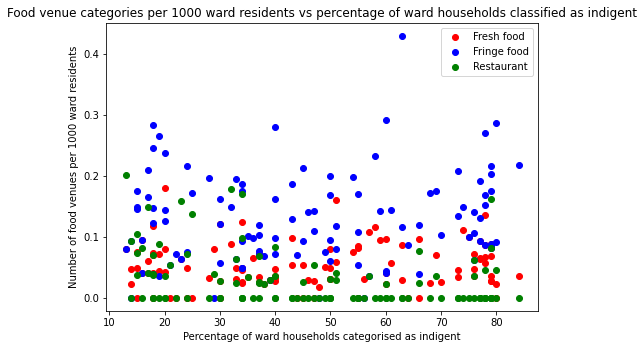

In [48]:
import matplotlib.pyplot as plt
x = ward_venue_totals["Percentage of households indigent"]
y1 = ward_venue_totals["Fresh food venues per 1000 residents"]
y2 = ward_venue_totals["Fringe food venues per 1000 residents"]
y3 = ward_venue_totals["Restaurant venues per 1000 residents"]

fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x, y1, color='r',label="Fresh food")
ax.scatter(x, y2, color='b',label = "Fringe food")
ax.scatter(x, y3, color='g',label = "Restaurant")

ax.legend()
ax.set_xlabel('Percentage of ward households categorised as indigent')
ax.set_ylabel('Number of food venues per 1000 ward residents')
ax.set_title('Food venue categories per 1000 ward residents vs percentage of ward households classified as indigent')
plt.show()

<p>The <b>ratio of fresh to fringe food venue prevalence</b> (measured as venues per 1 000 ward residents) across ward poverty levels is worth investigating as this impacts the food options available to ward residents. If more fringe food sources are available (compared to fresh food), it is more likely that residents will access these as components of their diets. It is ideal for a lower number of fringe food sources to be available compared to that of fresh foods, but not at the sacrifice of overall food access across the ward.</p>
<p>The scatterplot below shows that there appears to be no correlation between the ratio of fresh to fringe food venue prevalences across the percentage of households classified as indigent per ward. There is, however, a larger number of fringe food venues than fresh food venues for all but three wards. This shows that it would be much easier for residents in almost all wards to access unhealthier fringe food options than fresh food ones. This would have a negative impact on public health across all wards and all income groups.</p>

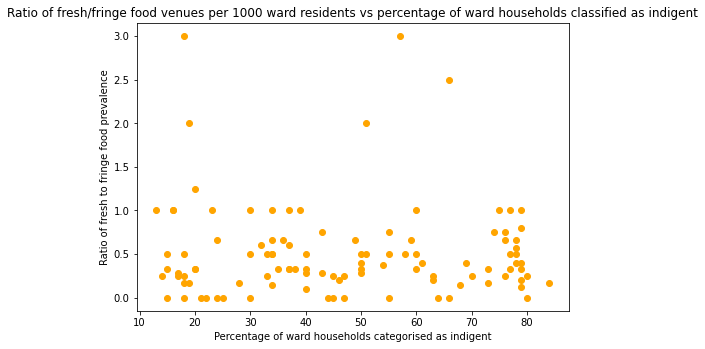

In [49]:
y4 = y1/y2
fig1 = plt.figure()

ax1=fig1.add_axes([0,0,1,1])
ax1.scatter(x, y4, color='orange',label="Fresh:fringe food ratio")

ax1.set_xlabel('Percentage of ward households categorised as indigent')
ax1.set_ylabel('Ratio of fresh to fringe food prevalence')
ax1.set_title('Ratio of fresh/fringe food venues per 1000 ward residents vs percentage of ward households classified as indigent')
plt.show()


<p>The total number of food venues per 1 000 ward residents (total food prevalence) across ward poverty levels is worth investigating as this impacts the food security of a community.</p>
<p>The scatterplot below shows that there appears to be a very weak positive correlation between the number of food venues per 1 000 ward residents and poverty in a ward. If this correlation is indeed true, it would show that poorer neighbourhoods have less access to food in their areas, even if the proportions of food categories are relatively similar to that of richer suburbs. This would have a negative impact on public health across poorer wards in the city.</p>

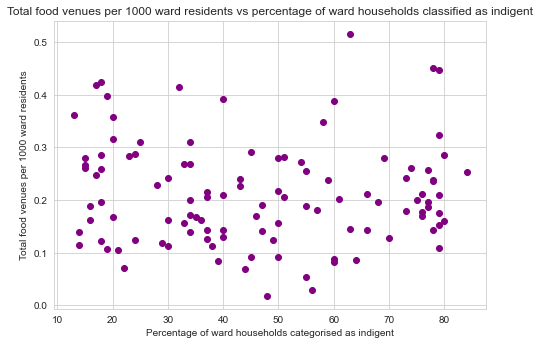

In [68]:
y5 = ward_venue_totals["All food venues per 1000 residents"]
fig2 = plt.figure()

ax2=fig2.add_axes([0,0,1,1])
ax2.scatter(x, y5, color='purple',label="Total food venues per 1000 ward residents")

ax2.set_xlabel('Percentage of ward households categorised as indigent')
ax2.set_ylabel('Total food venues per 1000 ward residents')
ax2.set_title('Total food venues per 1000 ward residents vs percentage of ward households classified as indigent')
plt.show()

<h2>4. Analysis</h2>
<h3>Further statistical analysis - Regression plots and ordinary least squares regression results</h3>
<p>We will plot the above variables in simple linear regressions in order to determine if there are any basic relationship or association between them. We will also use a regression analysis to confirm the strength of any relationship. For the ordinary least squares regression:
<ul>
    <li><b>R^2</b> and <b>adjusted R^2</b> represents the coefficient of determination and the percentage of variation in y that is accounted for by x. The larger this percentage, the stronger the relationship between these two variables.</li>
    <li>The <b>Prob (F-statistic)</b> shows the overall significance of the regression. The null hypothesis is that all regression coefficients are equal to zero. The probability of the F-statistic is the probability of the null hypothesis being true.</li>
    </ul>
    </p>
<h4>Number of fresh food venues per 1 000 ward residents vs percentage of households classified as indigent</h4>
<p><ul>
    <li>The least squares regression shows no correlation between the number of fresh food venues per 1000 ward residents and the percentage of households classified as indigent in a ward.</li>
    <li>R2 = 0.006 and adjusted R2 = -0.003. This shows no correlation between these two variables.</li>
    <li>Prob(F-statistic) = 0.408. This shows that the null hypothesis of the regression coefficients being equal to zero is unlikely true.</li>
    </ul>
    </p>
<p>
A possible reason for this observation is that supermarkets have expanded further into all suburbs of Cape Town. The number of supermarkets per ward does appear to be low, suggesting that the Foursquare Places source undercounts this. This number does not take into account any informal meat or vegetable traders, either.    
</p>

In [52]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

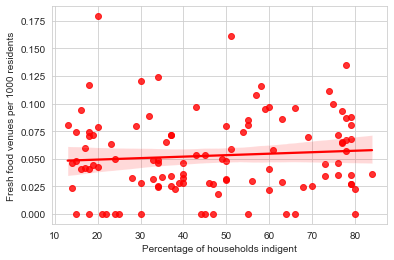

In [69]:
import seaborn as sns

ax3 = sns.set_style('whitegrid')
ax3 = sns.regplot(x = "Percentage of households indigent",y = "Fresh food venues per 1000 residents",data = ward_venue_totals,color = 'r')



In [70]:
# Create linear regression object
regr = linear_model.LinearRegression()
regr_recent = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x.values.reshape(-1, 1),y1.values.reshape(-1, 1))
regr_recent.fit(x.values[-10:].reshape(-1, 1), y1.values[-10:].reshape(-1, 1))

X2 = sm.add_constant(x.values.reshape(-1).astype(float))
est = sm.OLS(y1.values.reshape(-1).astype(float), X2)
est2 = est.fit()
print("Prevalence of fresh food venues/1000 ward residents vs percentage of ward households classified indigent")
print(est2.summary())


Prevalence of fresh food venues/1000 ward residents vs percentage of ward households classified indigent
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6896
Date:                Mon, 14 Nov 2022   Prob (F-statistic):              0.408
Time:                        15:39:59   Log-Likelihood:                 208.74
No. Observations:                 110   AIC:                            -413.5
Df Residuals:                     108   BIC:                            -408.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

<h4>Number of fringe food venues per 1 000 ward residents vs percentage of households classified as indigent</h4>
<p><ul>
    <li>The least squares regression shows a very weak negative correlation between the number of fringe food venues per 1000 ward residents and the percentage of households classified as indigent in a ward.</li>
    <li>R2 = 0.062 and adjusted R2 = 0.054. This shows no significant correlation between these two variables.</li>
    <li>Prob(F-statistic) = 0.008. This shows that the null hypothesis of the regression coefficients being equal to zero is not true.</li>
    </ul>
    </p>
<p>
A possible reason for this observation is that fringe food venues have expanded across all areas of Cape Town as they are popular with all income groups. The fringe food venue type may differ across these areas, with cheaper fast food brands choosing poorer suburbs over wealthier ones. Informal spaza shops and tuckshops may not be accounted for in the Foursquare data and the overall number of fringe food venues still appears to be very low, suggesting undercounting by the source.
</p>

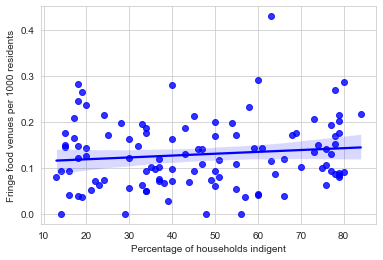

In [71]:
ax4 = sns.set_style('whitegrid')
ax4 = sns.regplot(x = "Percentage of households indigent",y = "Fringe food venues per 1000 residents",data = ward_venue_totals,color = 'b')


In [72]:
# Create linear regression object
regr = linear_model.LinearRegression()
regr_recent = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x.values.reshape(-1, 1),y2.values.reshape(-1, 1))
regr_recent.fit(x.values[-10:].reshape(-1, 1), y2.values[-10:].reshape(-1, 1))

X2 = sm.add_constant(x.values.reshape(-1).astype(float))
est = sm.OLS(y2.values.reshape(-1).astype(float), X2)
est2 = est.fit()
print("Prevalence of fringe food venues/1000 ward residents vs percentage of ward households classified indigent")
print(est2.summary())

Prevalence of fringe food venues/1000 ward residents vs percentage of ward households classified indigent
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.527
Date:                Mon, 14 Nov 2022   Prob (F-statistic):              0.219
Time:                        15:40:03   Log-Likelihood:                 131.30
No. Observations:                 110   AIC:                            -258.6
Df Residuals:                     108   BIC:                            -253.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

<h4>Number of restaurant venues per 1 000 ward residents vs percentage of households classified as indigent</h4>
<p><ul>
    <li>The least squares regression shows a very weak negative correlation between the number of restaurant venues per 1000 ward residents and the percentage of households classified as indigent in a ward.</li>
    <li>R2 = 0.159 and adjusted R2 = 0.151. This shows no significant correlation between these two variables.</li>
    <li>Prob(F-statistic) = 1.5x10^-5. This shows that the null hypothesis of the regression coefficients being equal to zero is not true.</li>
    </ul>
    </p>
<p>
A possible reason for this observation is that restaurants cater for richer customers so it would make sense for these to be in tourist areas or wealthier suburbs. The number of restaurants per ward seems quite low, suggesting that the Foursquare Places source undercounted these.
</p>

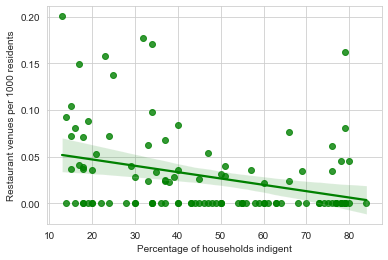

In [73]:
ax5 = sns.set_style('whitegrid')
ax5 = sns.regplot(x = "Percentage of households indigent",y = "Restaurant venues per 1000 residents",data = ward_venue_totals,color = 'g')

 

In [74]:
# Create linear regression object
regr = linear_model.LinearRegression()
regr_recent = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x.values.reshape(-1, 1),y3.values.reshape(-1, 1))
regr_recent.fit(x.values[-10:].reshape(-1, 1), y3.values[-10:].reshape(-1, 1))

X2 = sm.add_constant(x.values.reshape(-1).astype(float))
est = sm.OLS(y3.values.reshape(-1).astype(float), X2)
est2 = est.fit()
print("Prevalence of restaurant venues/1000 ward residents vs percentage of ward households classified indigent")
print(est2.summary())

Prevalence of restaurant venues/1000 ward residents vs percentage of ward households classified indigent
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     12.81
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           0.000517
Time:                        15:40:11   Log-Likelihood:                 190.59
No. Observations:                 110   AIC:                            -377.2
Df Residuals:                     108   BIC:                            -371.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

<h4>Ratio of fresh food venues/fringe food venues per ward vs percentage of households classified as indigent</h4>
<p><ul>
    <li>The least squares regression shows no correlation between the ratio of fresh food venues/fringe food venues per ward and the percentage of households classified as indigent.</li>
    <li>R2 = 0.004 and adjusted R2 = -0.005. This shows no significant correlation between these two variables.</li>
    <li>Prob(F-statistic) = 0.517. The probability of the null hypothesis being true can therefore not be confirmed.</li>
    </ul>
    </p>
<p>
What is notable is that the number of fringe food venues per ward is almost consistently larger than the number of fresh food venues, barring three wards. (This is shown with a ratio smaller than 1.) This phenomenon is not linked to wealth and shows that this facet of food security may be a problem across the entire Cape Town area.
</p>

In [76]:
#ax6 = sns.set_style('whitegrid')
#ax6 = sns.regplot(x = "Percentage of households indigent",y = y4,data = ward_venue_totals,color = 'orange')
#ax6.set(ylabel = "Ratio of prevalence of fresh to fringe foods")


In [77]:
# Create linear regression object
#regr = linear_model.LinearRegression()
#regr_recent = linear_model.LinearRegression()

# Train the model using the training sets
#regr.fit(x.values.reshape(-1, 1),y4.values.reshape(-1, 1))
#regr_recent.fit(x.values[-10:].reshape(-1, 1), y4.values[-10:].reshape(-1, 1))

#X2 = sm.add_constant(x.values.reshape(-1).astype(float))
#est = sm.OLS(y4.values.reshape(-1).astype(float), X2)
#est2 = est.fit()
#print("Ratio of fresh/fringe food venue prevalence vs percentage of ward households classified indigent")
#print(est2.summary())

<h4>Number of food venues per 1 000 ward residents vs percentage of households classified as indigent</h4>
<p><ul>
    <li>The least squares regression shows a weak negative correlation between the number of food venues per 1000 ward residents and the percentage of households classified as indigent in a ward.</li>
    <li>R2 = 0.132 and adjusted R2 = 0.124. This shows no significant correlation between these two variables.</li>
    <li>Prob(F-statistic) = 8.9x10^-5. This shows that the null hypothesis of the regression coefficients being equal to zero is not true.</li>
    </ul>
    </p>
<p>
This observation is notable as simple access to food sources is the backbone of basic food security. As the Foursquare data did not collect many venues or food venues for Cape Town, it would be interesting to see what a data source like Google Places would yield for this. (Google Places is much more popular than Foursquare Places in South Africa.) The food venues counted in the current data source do not take informal traders into account. If the raw number of food venues per 1000 ward residents differs over the wealth of different suburbs, this would be a major public health concern for policy makers to address. This would also create an opportunity to promote the expansion of fresh food venues in poorer areas over franchised fast food and fringe food sources. A way to estimate informal food vendor locations and numbers should also be considered.</p>

[Text(0, 0.5, 'Total food venues per 1000 ward residents')]

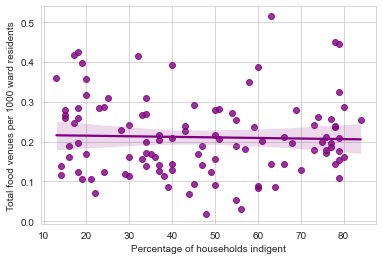

In [78]:
ax8 = sns.set_style('whitegrid')
ax8 = sns.regplot(x = "Percentage of households indigent",y = y5,data = ward_venue_totals,color = 'purple')
ax8.set(ylabel = "Total food venues per 1000 ward residents")


In [79]:
# Create linear regression object
regr = linear_model.LinearRegression()
regr_recent = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x.values.reshape(-1, 1),y5.values.reshape(-1, 1))
regr_recent.fit(x.values[-10:].reshape(-1, 1), y5.values[-10:].reshape(-1, 1))

X2 = sm.add_constant(x.values.reshape(-1).astype(float))
est = sm.OLS(y5.values.reshape(-1).astype(float), X2)
est2 = est.fit()
print("Total food venues per 1000 ward residents vs percentage of ward households classified indigent")
print(est2.summary())

Total food venues per 1000 ward residents vs percentage of ward households classified indigent
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.1116
Date:                Mon, 14 Nov 2022   Prob (F-statistic):              0.739
Time:                        15:42:03   Log-Likelihood:                 100.64
No. Observations:                 110   AIC:                            -197.3
Df Residuals:                     108   BIC:                            -191.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

<h2>5. Results and discussion</h2>

<p>This report sought to describe the relationship between the geography of Cape Town, the location of poor households and their access to different types of food sources. The number of fresh food venues, fringe food venues, restaurant venues, and total food venues per 1 000 ward residents was analysed against the percentage of households in a ward classified as indigent. There was also an attempt to cluster the wards by the prevalence of these three food venue categories and percentage of households classified as indigent.</p>

<p><i>Overall results</i></p>  
    
<p>From the statistical analysis, there appeared to be no significant correlation between the prevalence of any food venue category and the percentage of households in that ward classified as indigent. This was used as a metric for gauging food security and access against poverty across areas in Cape Town. No conclusion can therefore be made on poorer suburbs having a lower prevalence of fresh food venues or total number of food venues. Therefore, no significant difference in food security across areas of different wealth can be concluded. This result should be interpreted with caution because the number of food venues returned per ward was sparse.
The clustering of wards by prevalence of different food venues and percentage of households classified as indigent was inconclusive, as the clustering was heavily skewed towards the quartile bin for household poverty classification. No recommendations can therefore be made to policy makers on classifications of areas around the city based on food access.</p>

<p><i>Critique of study</i></p>
    
<p>The largest shortcoming of this research project was the meagre number of venues returned by the Foursquare Places API call. This could be attributed to Google Maps being far more popular in South Africa than Foursquare. The next largest shortcoming was that any informal vendors were not accounted for in the venue data (and will probably not be accounted for when using Google Places, either). This excludes many food sources that make up a large portion of the food retail sector in poorer areas.</p>

<p><i>Recommendations</i></p>
<p>As the number of venues (including food venues) retrieved for each ward was much lower than anticipated, it is recommended that the same analysis be carried out using the Google Places API instead of the Foursquare Places API. It is also recommended that a method for estimating the location and number of informal food vendors per ward be considered if further analysis is performed. This could be done with a basic field survey per ward or using trader permit application data from the City of Cape Town. It would be prudent to make use of the upcoming 2021 census data for any follow up investigation, as the 2011 is currently 9 years old. </p>
    <p>
For further analyses, the burden of degenerative diseases per ward of Cape Town should be estimated using public and private hospital data to determine if there is any relationship between food access and actual degenerative disease outcome. As this burden will mostly be carried by the state, effective planning of public health resources will be required to prepare for this.</p>

<h2>6. Conclusion</h2>
<p>In this report, the relationship between the geography of Cape Town, the location of poor households and their access to different types of food sources was analysed. This was done by using features of Foursquare data and census data such as the number of food venues, fresh food venues, fringe food venues, restaurants venues, and the percentage of households classified as indigent per 111 wards of Cape Town. These features were analysed using k-means clustering and linear regression analysis to determine if any relationship between features existed and the strength thereof. As food security is intrinsically linked to the prevalence of degenerative diseases and impacts public health, it would be in the best interests of policy makers and communities to determine where to focus their efforts.</p>
<p>
No conclusion could be drawn on any relationships between food access, location, and poverty in the city as no statistically significant correlation was found. This could partly be attributed to the sparse number of food venues returned by the data source per ward. It is recommended that this research question be reanalysed using a larger food venue data source such as Google Places. It would also be prudent to determine the location and number of informal food vendors per ward that would not be included in this online data. No recommendations can therefore be made to policy makers or communities on the relationship between geography and food security in Cape Town</p>